logistic regression.
KNN
NB
SVM
Decision Tree
Random Forest
XGBoost
GradientBoosting
AdaBoost
lightGBM

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("heart_2022_no_nans.csv")
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,4.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.60,71.67,27.99,No,No,Yes,Yes,"Yes, received Tdap",No,No
1,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,6.0,None of them,No,...,1.78,95.25,30.13,No,No,Yes,Yes,"Yes, received tetanus shot but not sure what type",No,No
2,Alabama,Male,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,"6 or more, but not all",No,...,1.85,108.86,31.66,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
3,Alabama,Female,Fair,5.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,None of them,No,...,1.70,90.72,31.32,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,Yes
4,Alabama,Female,Good,3.0,15.0,Within past year (anytime less than 12 months ...,Yes,5.0,1 to 5,No,...,1.55,79.38,33.07,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246022 entries, 0 to 246021
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      246022 non-null  object 
 1   Sex                        246022 non-null  object 
 2   GeneralHealth              246022 non-null  object 
 3   PhysicalHealthDays         246022 non-null  float64
 4   MentalHealthDays           246022 non-null  float64
 5   LastCheckupTime            246022 non-null  object 
 6   PhysicalActivities         246022 non-null  object 
 7   SleepHours                 246022 non-null  float64
 8   RemovedTeeth               246022 non-null  object 
 9   HadHeartAttack             246022 non-null  object 
 10  HadAngina                  246022 non-null  object 
 11  HadStroke                  246022 non-null  object 
 12  HadAsthma                  246022 non-null  object 
 13  HadSkinCancer              24

In [74]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [75]:
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols

['PhysicalHealthDays',
 'MentalHealthDays',
 'SleepHours',
 'HeightInMeters',
 'WeightInKilograms',
 'BMI']

In [76]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['State',
 'Sex',
 'GeneralHealth',
 'LastCheckupTime',
 'PhysicalActivities',
 'RemovedTeeth',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes',
 'DeafOrHardOfHearing',
 'BlindOrVisionDifficulty',
 'DifficultyConcentrating',
 'DifficultyWalking',
 'DifficultyDressingBathing',
 'DifficultyErrands',
 'SmokerStatus',
 'ECigaretteUsage',
 'ChestScan',
 'RaceEthnicityCategory',
 'AgeCategory',
 'AlcoholDrinkers',
 'HIVTesting',
 'FluVaxLast12',
 'PneumoVaxEver',
 'TetanusLast10Tdap',
 'HighRiskLastYear',
 'CovidPos']

<Axes: title={'center': 'Répartition de la variable cible'}, ylabel='count'>

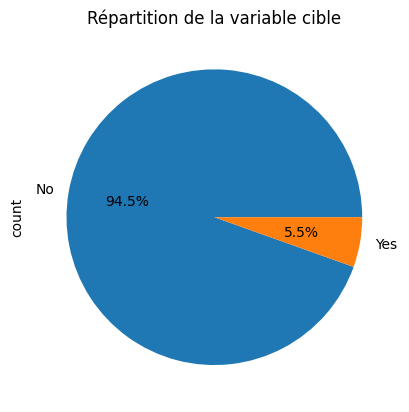

In [77]:
df["HadHeartAttack"].value_counts().plot(kind="pie", autopct="%1.1f%%", title="Répartition de la variable cible")

In [78]:
df.describe(include='all')

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
count,246022,246022,246022,246022.000000,246022.000000,246022,246022,246022.000000,246022,246022,...,246022.000000,246022.000000,246022.000000,246022,246022,246022,246022,246022,246022,246022
unique,54,2,5,NaN,NaN,4,2,NaN,4,2,...,NaN,NaN,NaN,2,2,2,2,4,2,3
top,Washington,Female,Very good,NaN,NaN,Within past year (anytime less than 12 months ...,Yes,NaN,None of them,No,...,NaN,NaN,NaN,Yes,No,Yes,No,"No, did not receive any tetanus shot in the pa...",No,No
freq,15000,127811,86999,NaN,NaN,198153,191318,NaN,131592,232587,...,NaN,NaN,NaN,135307,161520,131196,146130,81747,235446,167306
mean,NaN,NaN,NaN,4.119026,4.167140,NaN,NaN,7.021331,NaN,NaN,...,1.705150,83.615179,28.668136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,8.405844,8.102687,NaN,NaN,1.440681,NaN,NaN,...,0.106654,21.323156,6.513973,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,...,0.910000,28.120000,12.020000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,6.000000,NaN,NaN,...,1.630000,68.040000,24.270000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,7.000000,NaN,NaN,...,1.700000,81.650000,27.460000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,3.000000,4.000000,NaN,NaN,8.000000,NaN,NaN,...,1.780000,95.250000,31.890000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


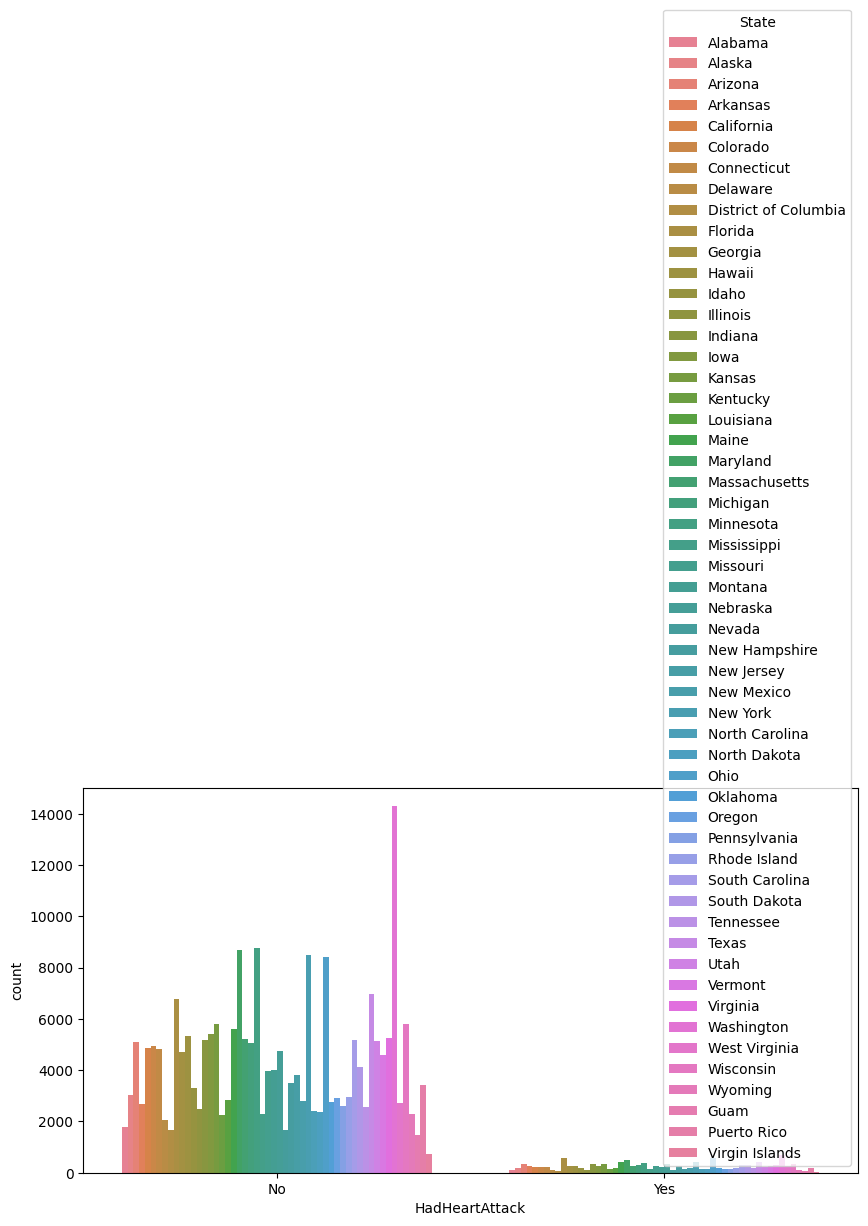

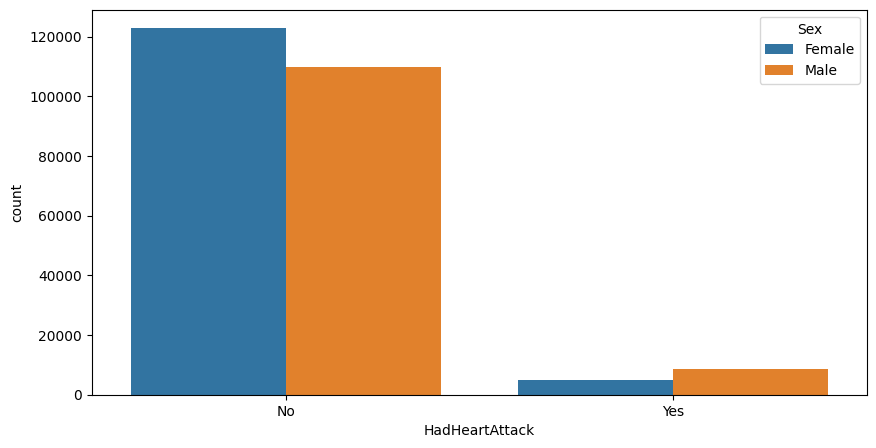

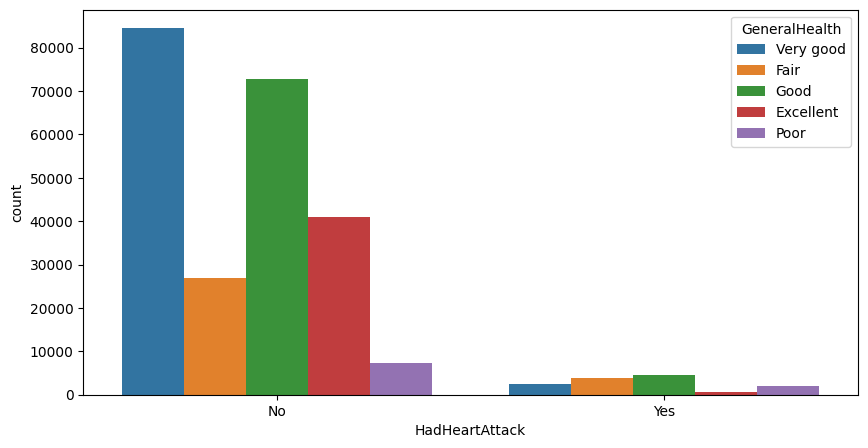

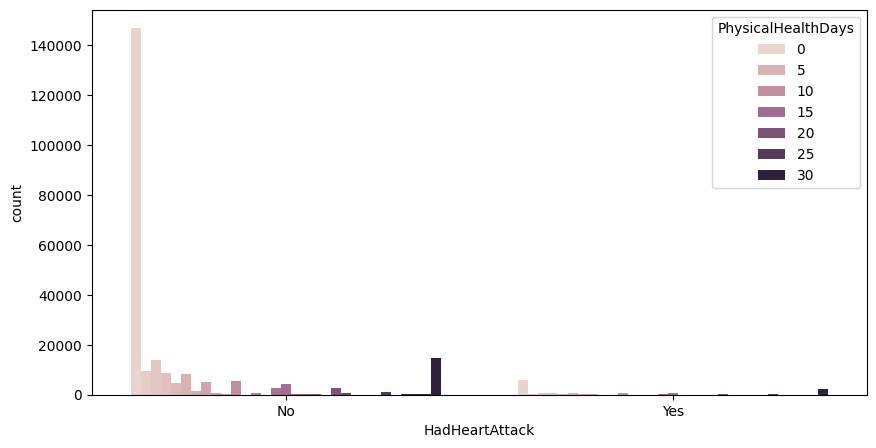

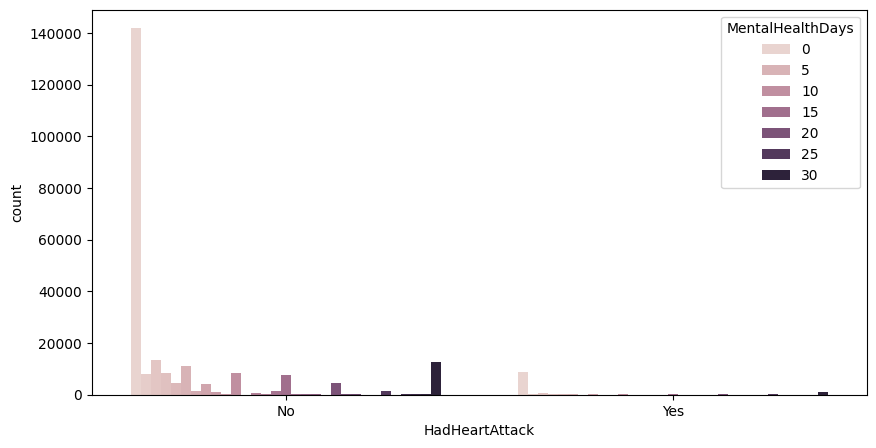

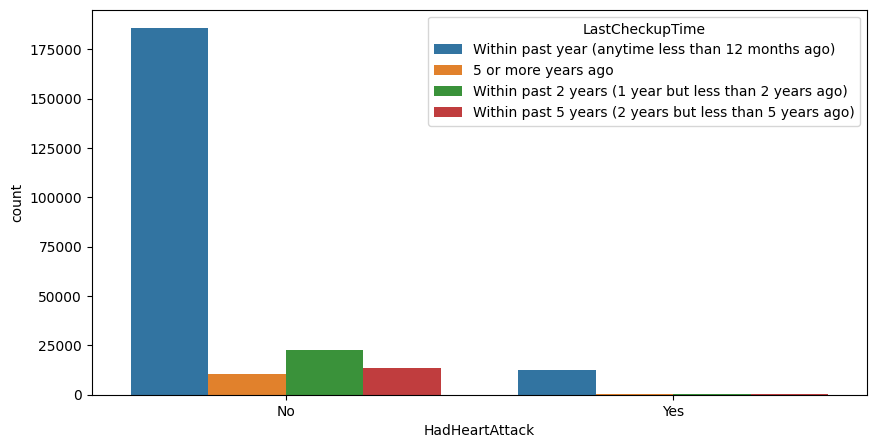

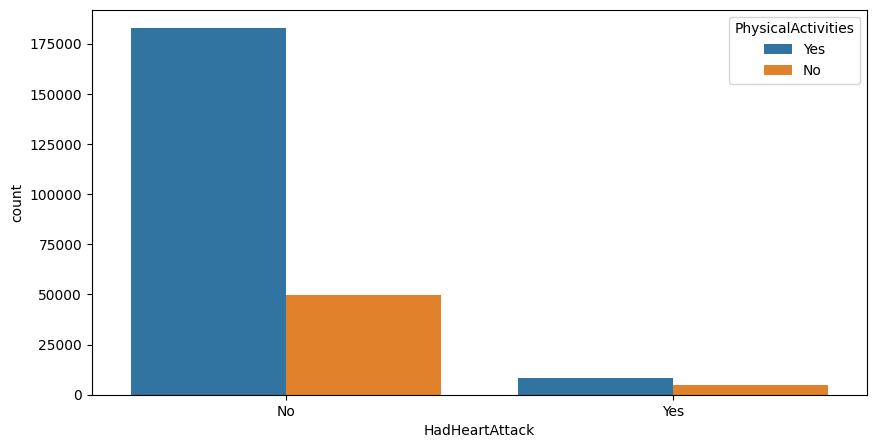

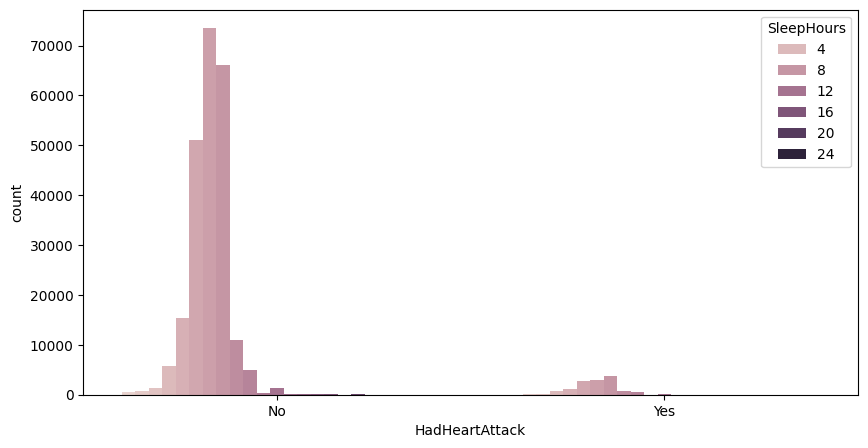

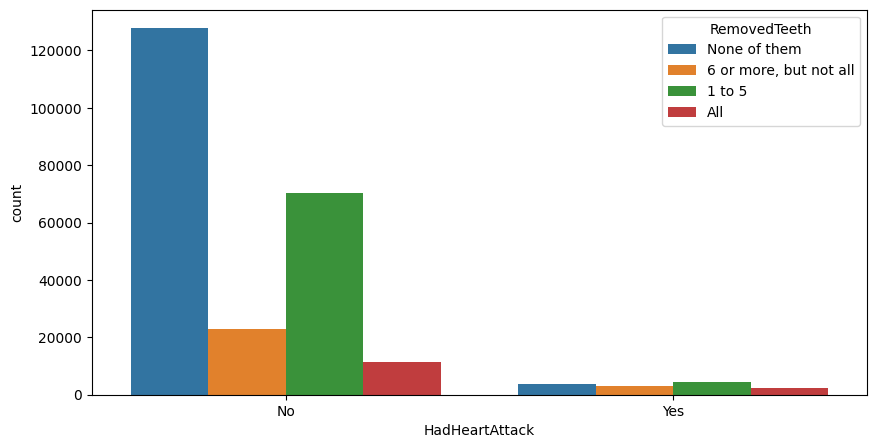

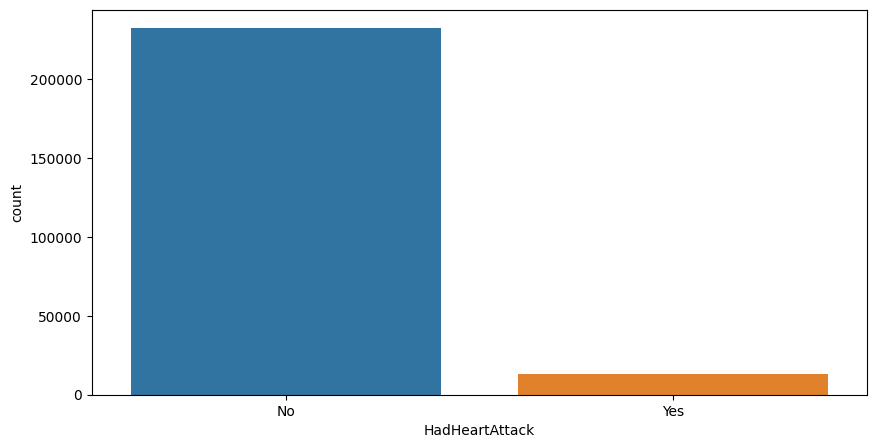

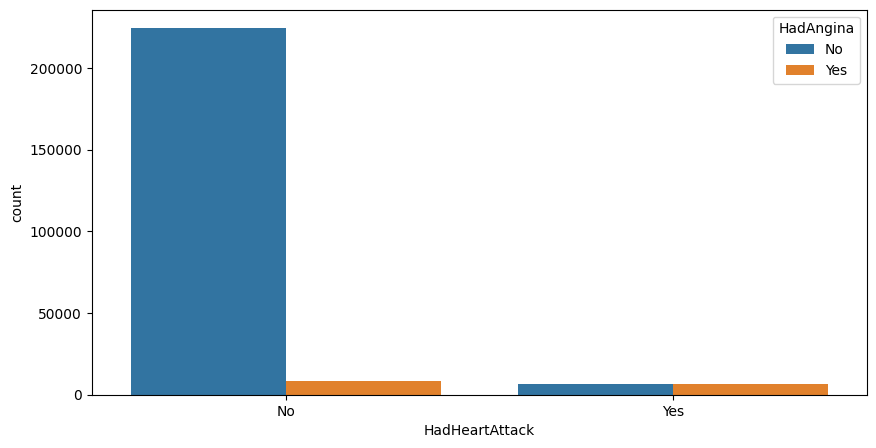

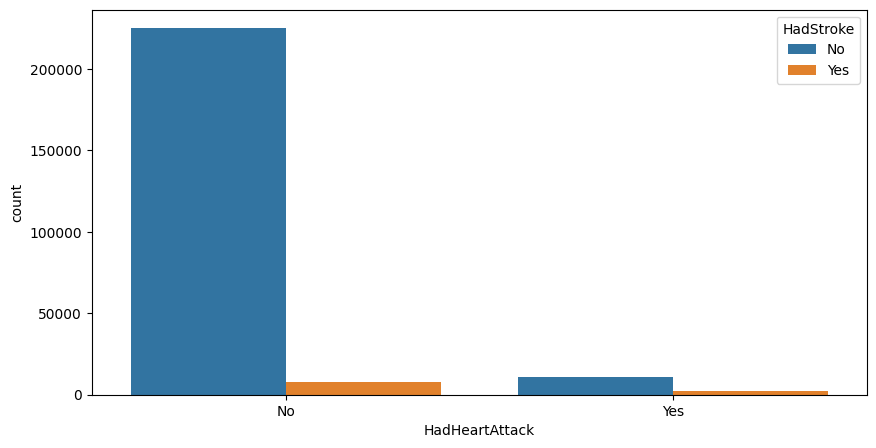

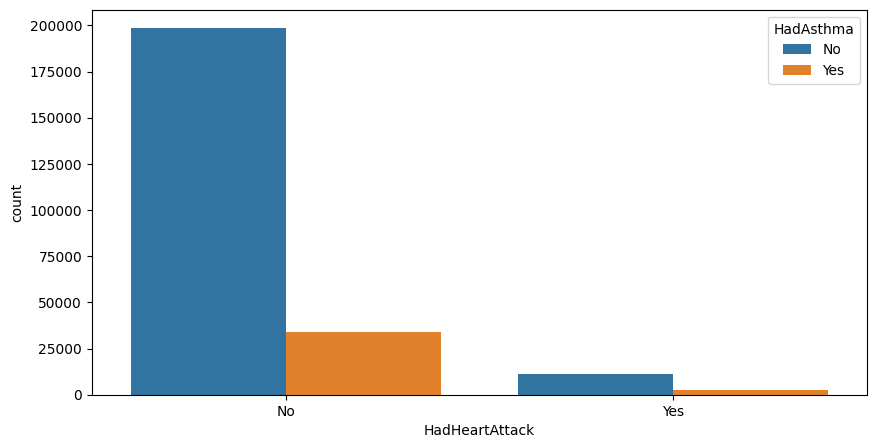

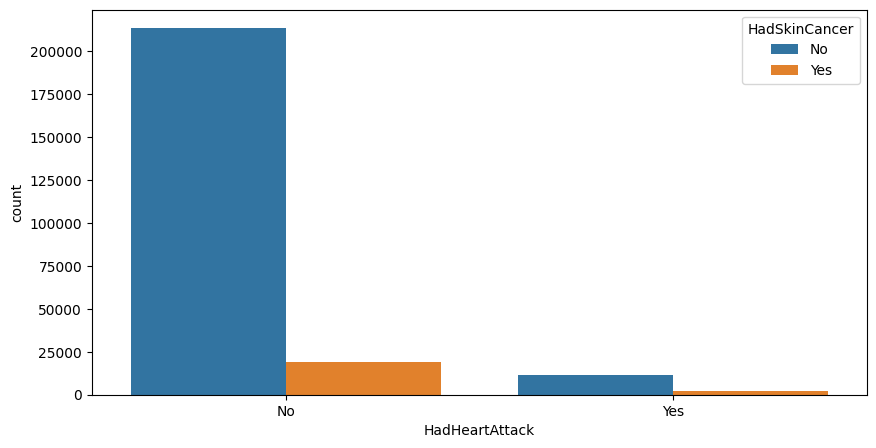

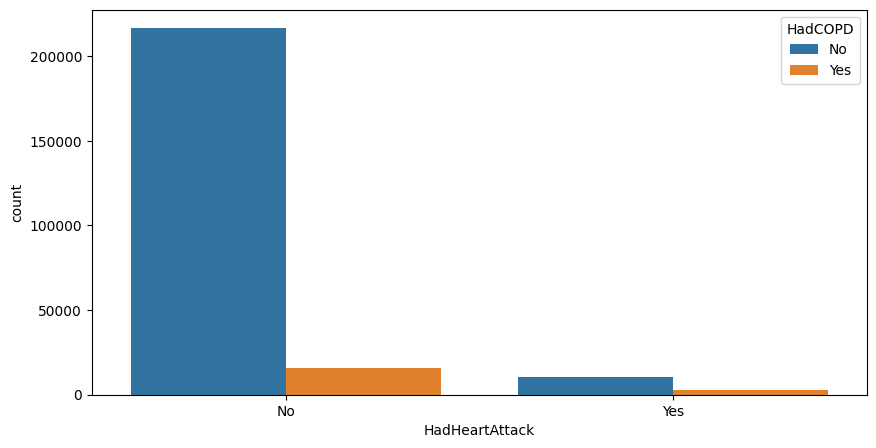

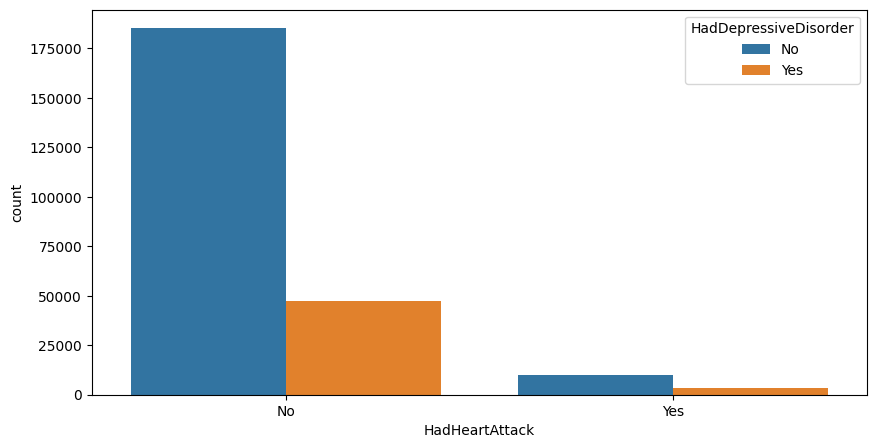

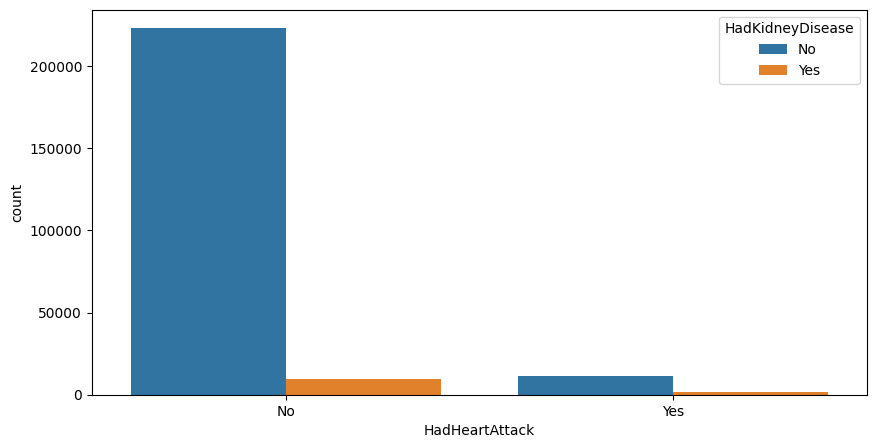

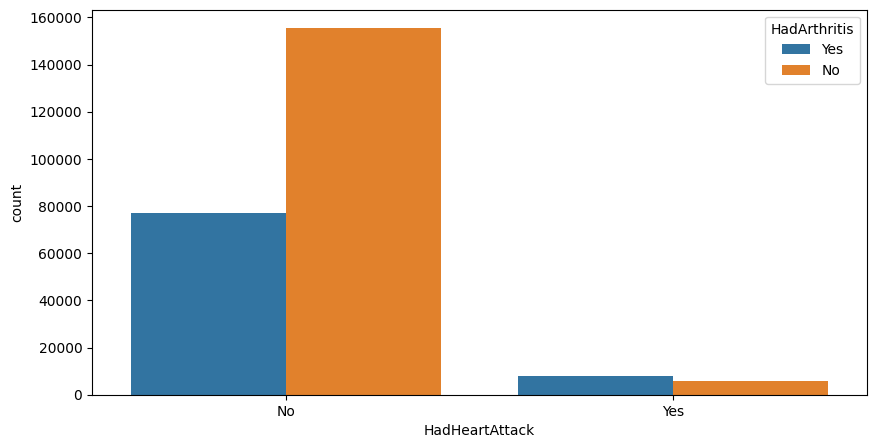

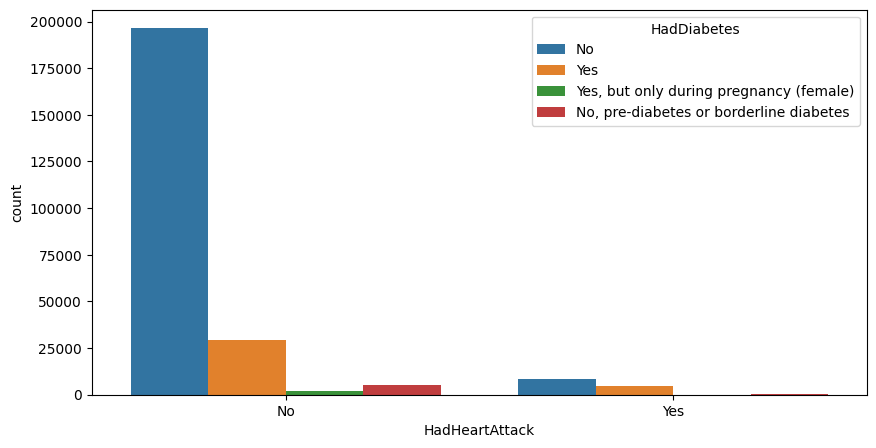

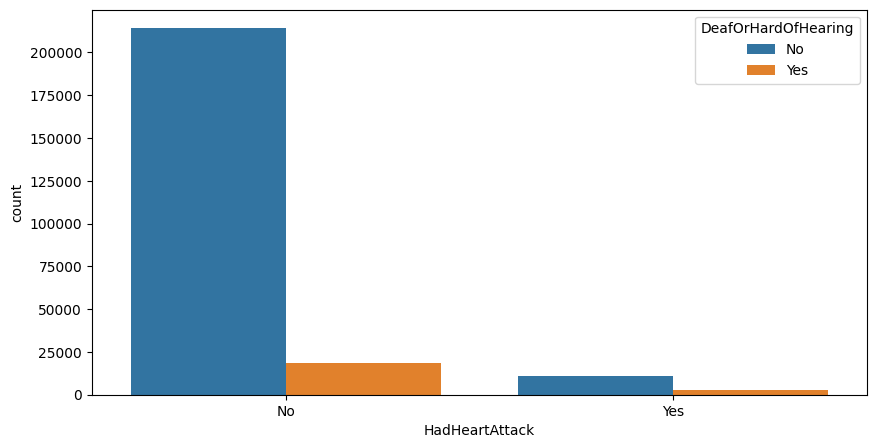

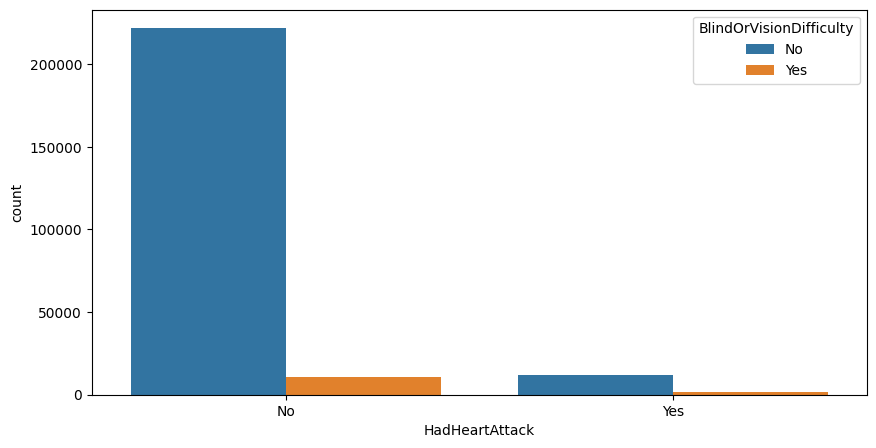

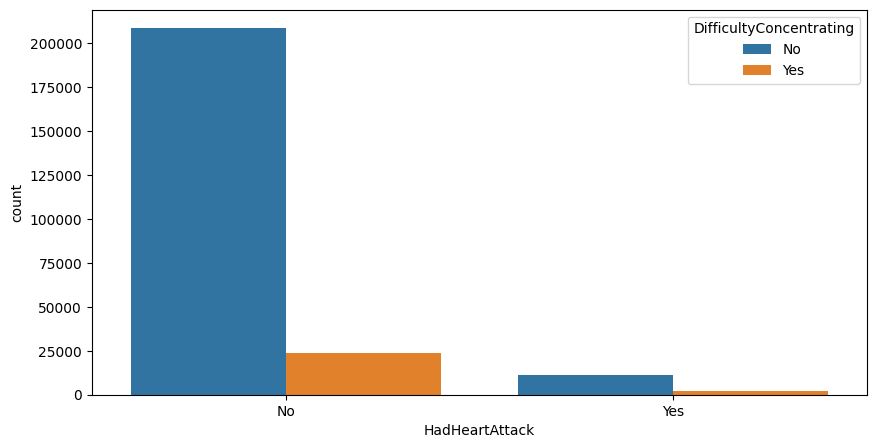

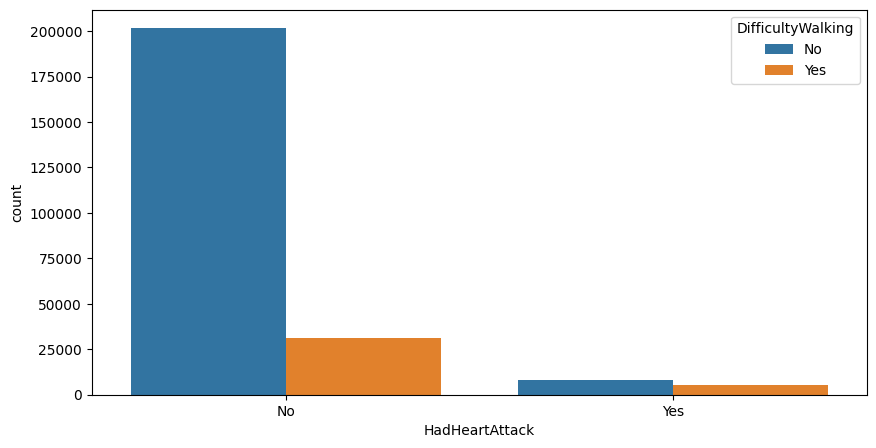

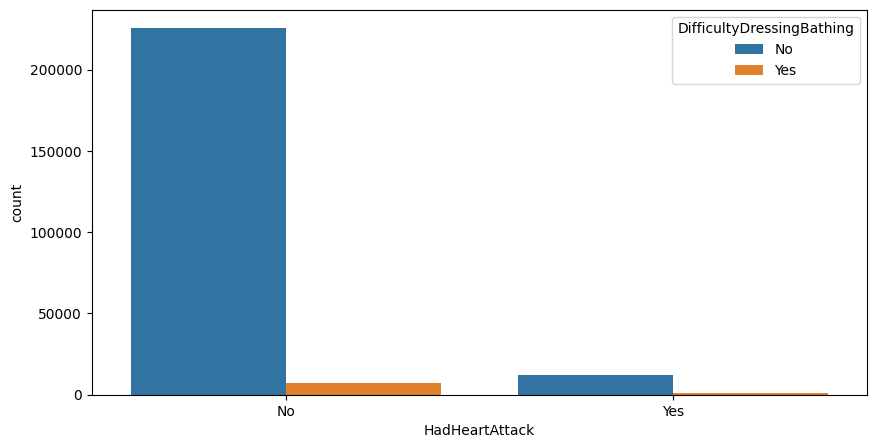

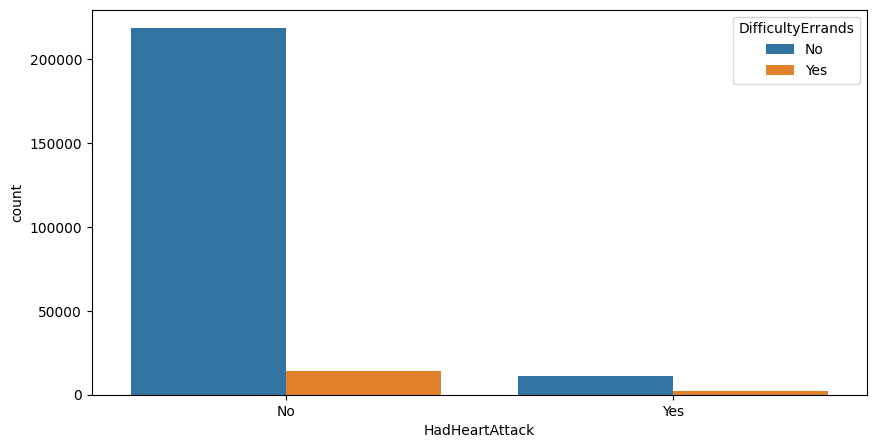

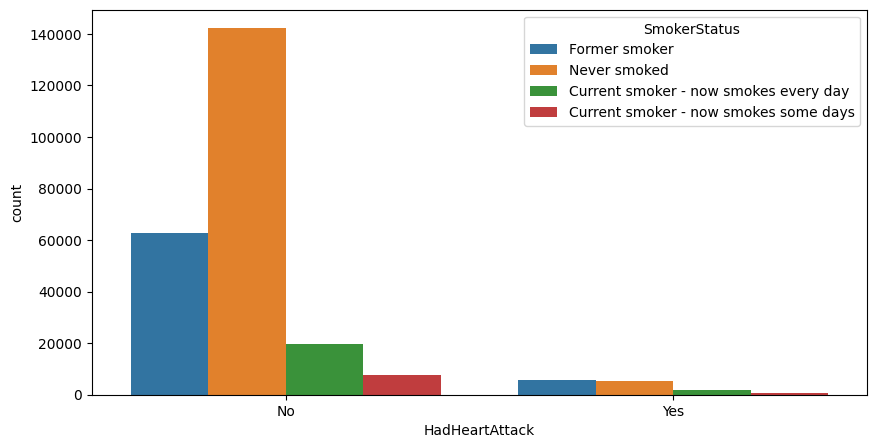

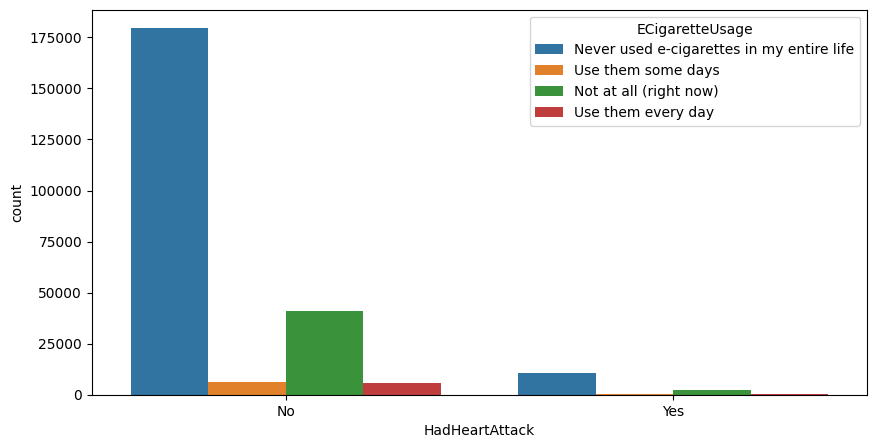

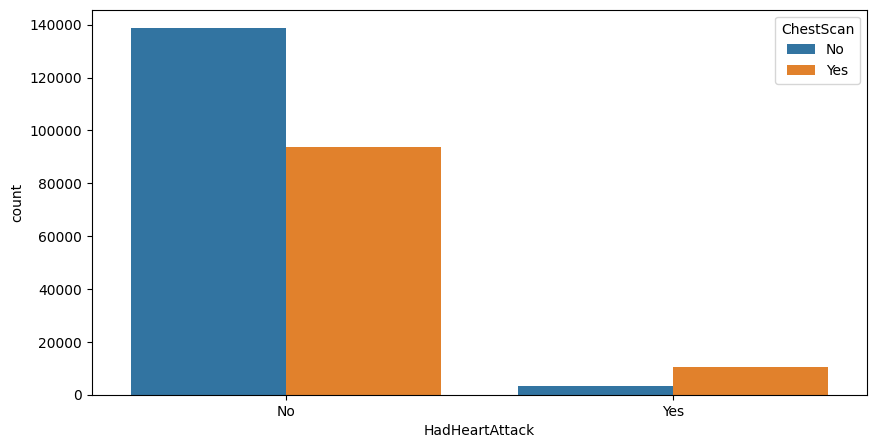

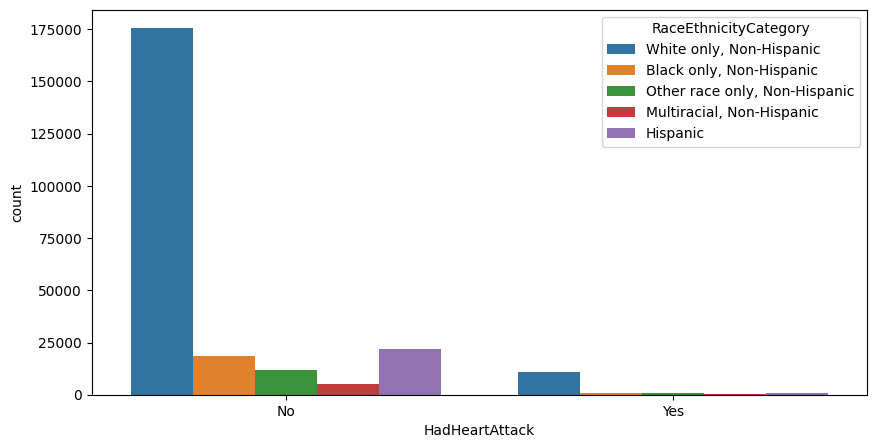

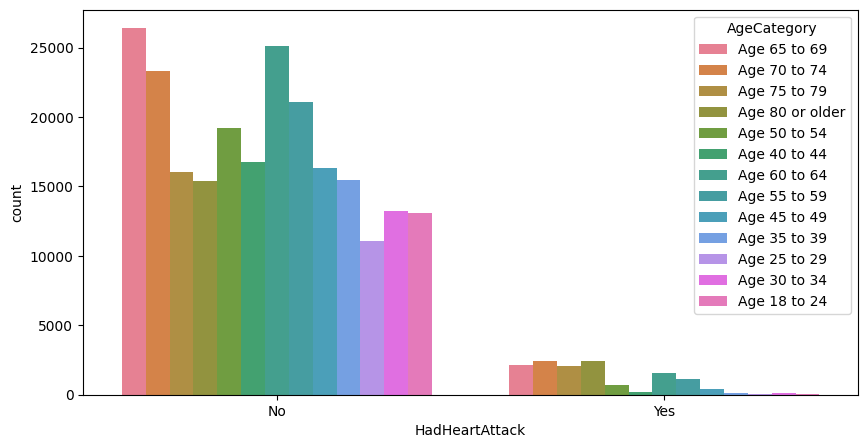

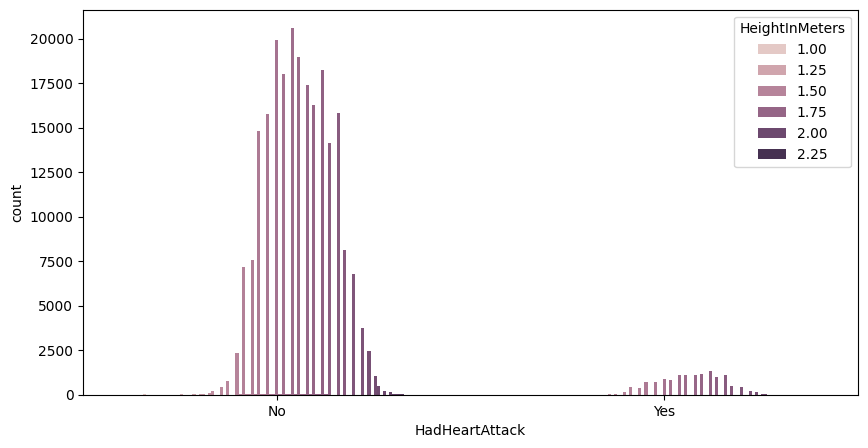

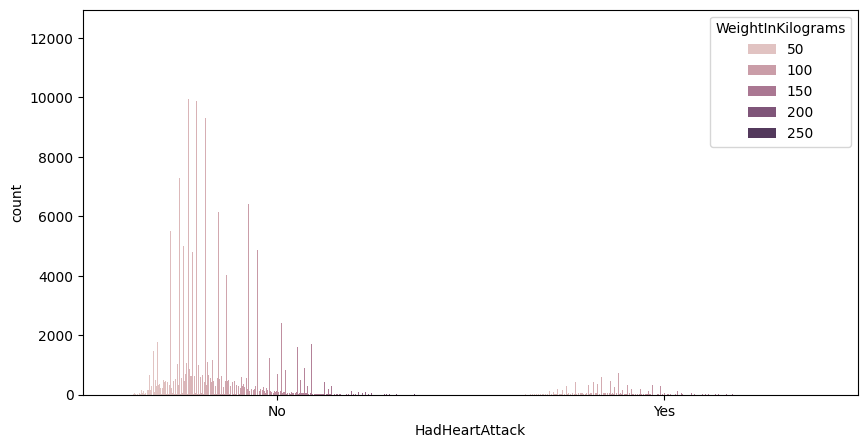

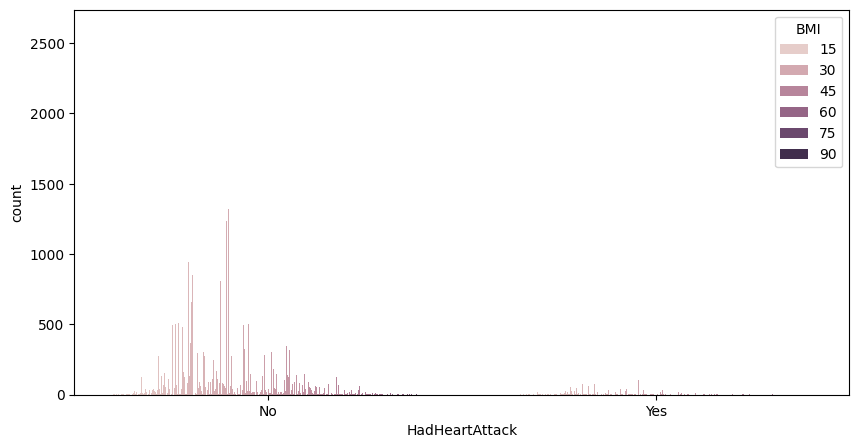

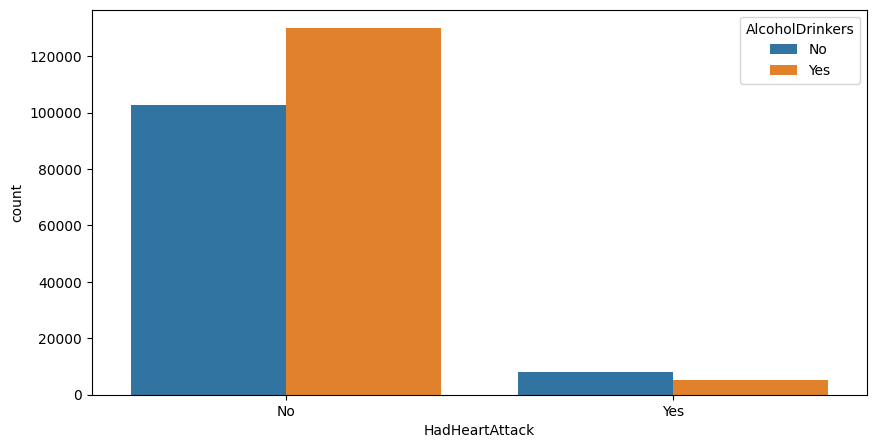

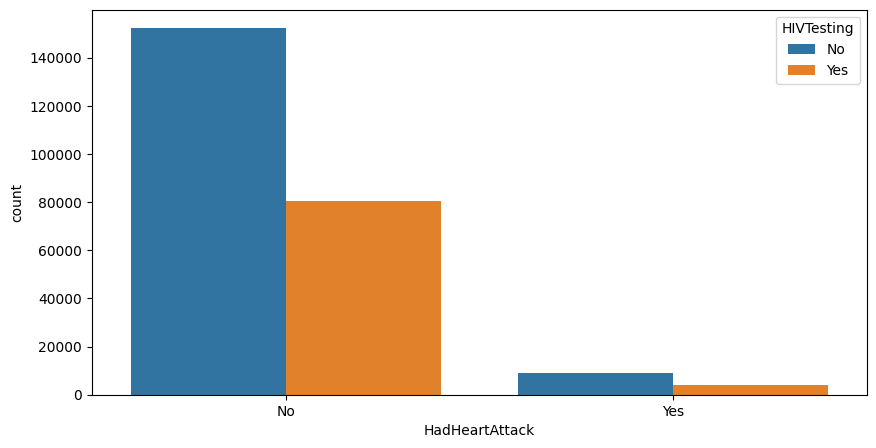

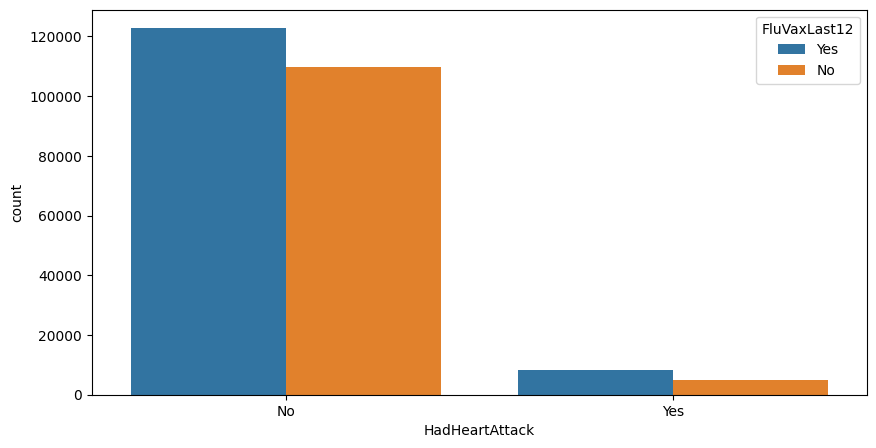

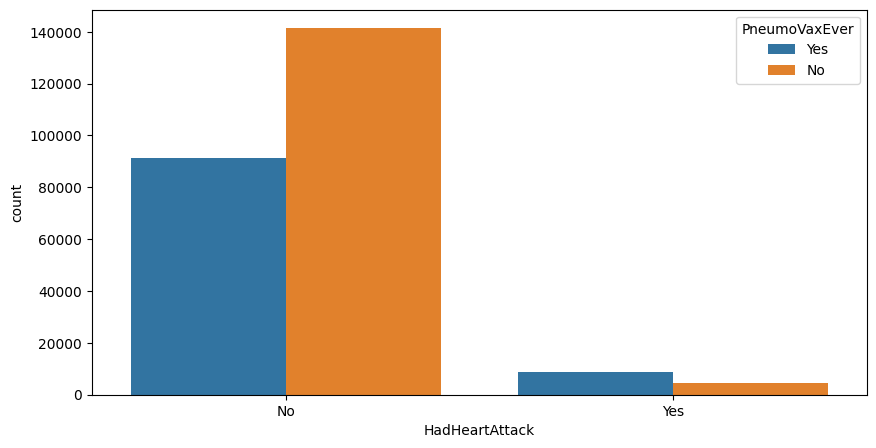

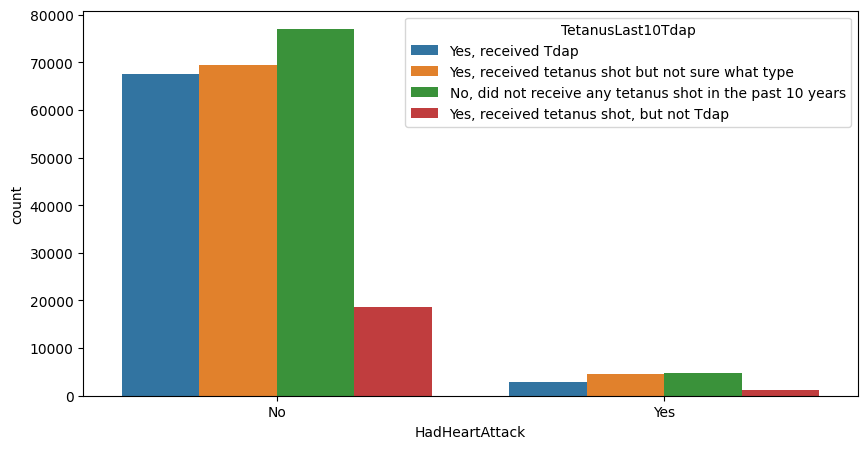

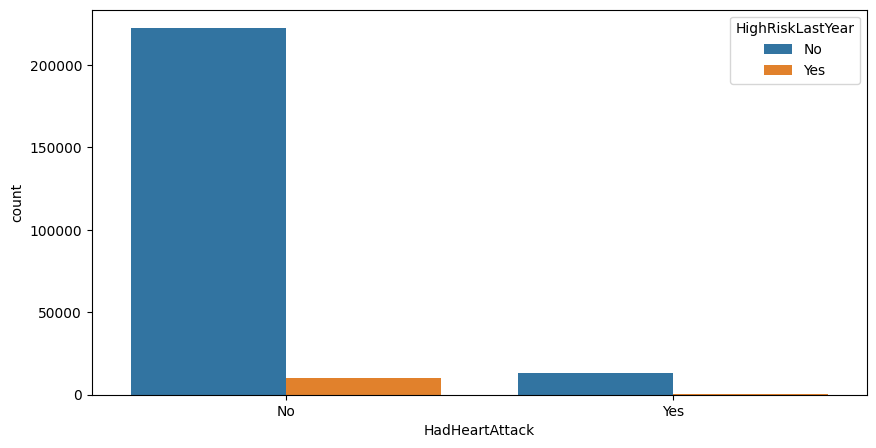

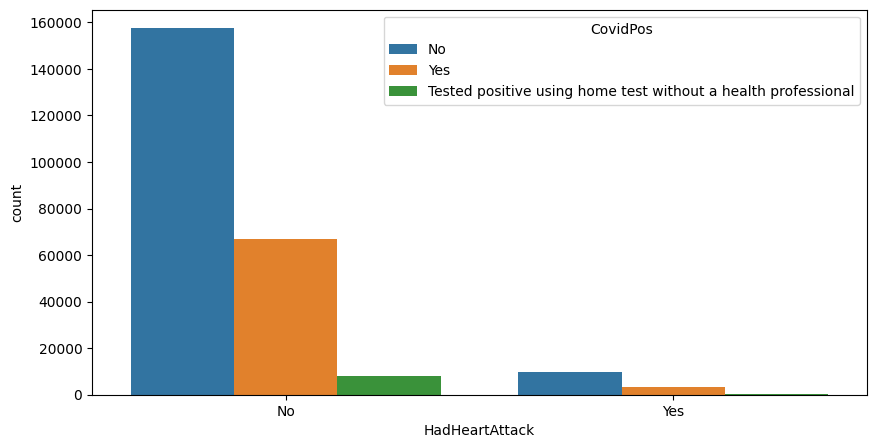

In [79]:
columns = df.columns.tolist()

for column in columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x='HadHeartAttack', hue=column, data=df)
    plt.show()

In [80]:
# dff = df.drop(columns=['State', 'RemovedTeeth', 'LastCheckupTime', 'ChestScan',
#                        'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap'])
# dff.columns
# dff

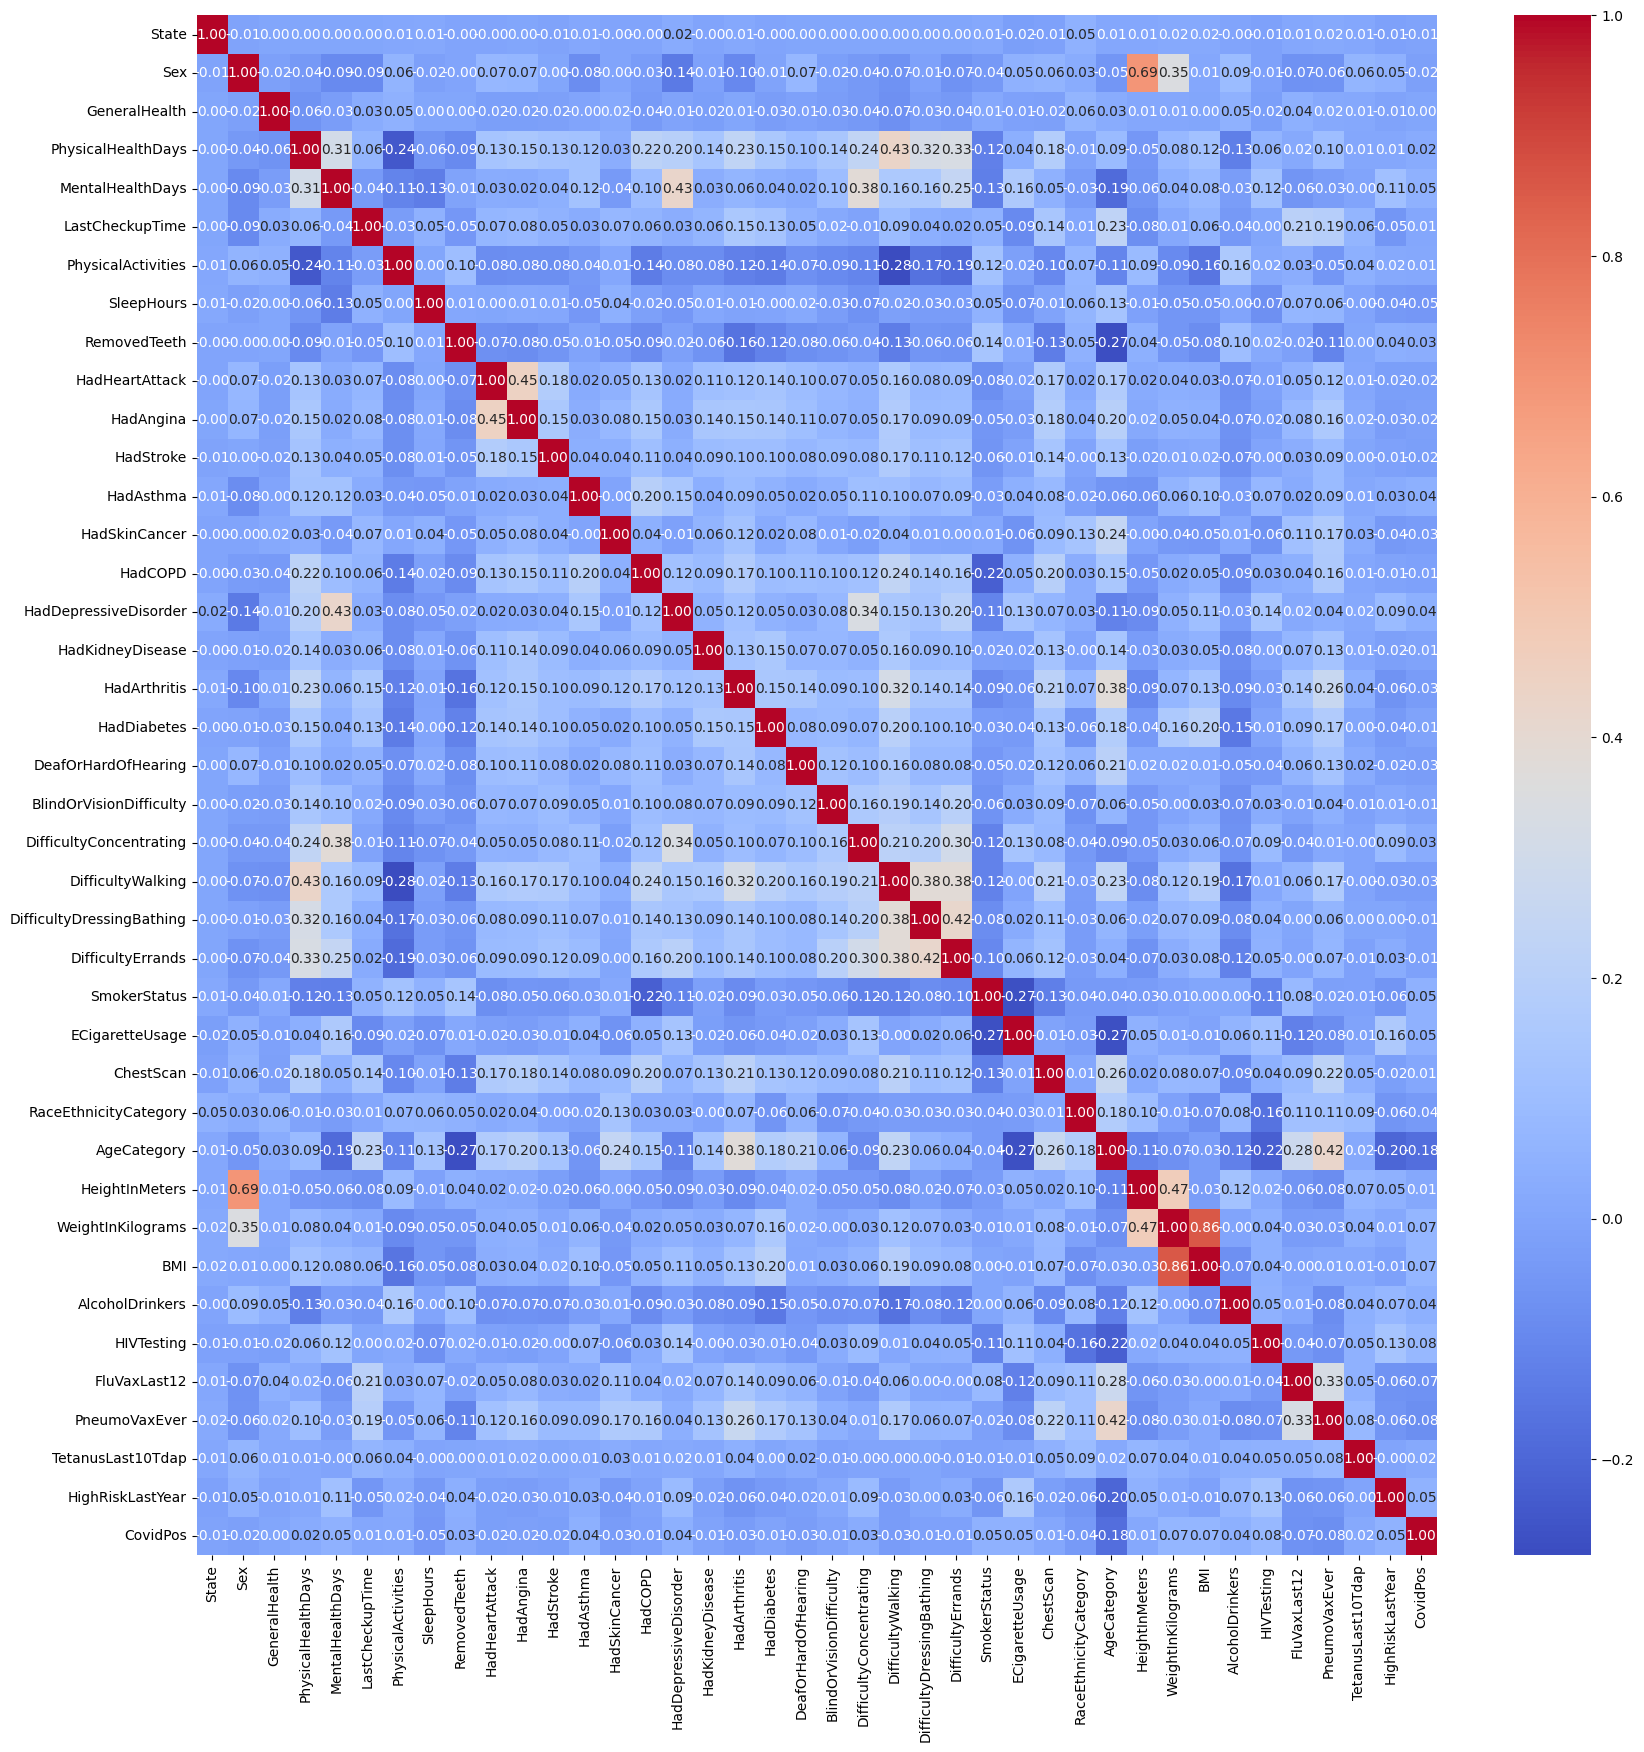

In [81]:
# Encode categorical columns
from sklearn.calibration import LabelEncoder

label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Calculate correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

model = LogisticRegression()
rfe = RFE(model)  # choose the top 5 features
fit = rfe.fit(X, y)

print("Num Features: %d" % fit.n_features_)
selected_features = pd.Series(rfe.support_, index = X.columns)
print(selected_features)
feature_ranking = pd.Series(rfe.ranking_, index = X.columns)
print(feature_ranking)

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

Num Features: 19
State                        False
Sex                           True
GeneralHealth                False
PhysicalHealthDays           False
MentalHealthDays             False
LastCheckupTime               True
PhysicalActivities            True
SleepHours                   False
RemovedTeeth                 False
HadAngina                     True
HadStroke                     True
HadAsthma                    False
HadSkinCancer                False
HadCOPD                       True
HadDepressiveDisorder         True
HadKidneyDisease              True
HadArthritis                  True
HadDiabetes                   True
DeafOrHardOfHearing          False
BlindOrVisionDifficulty       True
DifficultyConcentrating      False
DifficultyWalking             True
DifficultyDressingBathing    False
DifficultyErrands             True
SmokerStatus                  True
ECigaretteUsage              False
ChestScan                     True
RaceEthnicityCategory        False
Age

In [83]:
selected_features_mask = rfe.support_
selected_features_df = X.loc[:, selected_features_mask]

In [85]:
selected_features_df

,Sex,LastCheckupTime,PhysicalActivities,HadAngina,HadStroke,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,BlindOrVisionDifficulty,DifficultyWalking,DifficultyErrands,SmokerStatus,ChestScan,AgeCategory,HeightInMeters,AlcoholDrinkers,FluVaxLast12
0,0,3,1,0,0,0,0,0,1,0,0,0,0,2,0,9,1.60,0,1
1,1,3,1,0,0,0,0,0,1,2,0,0,0,2,0,10,1.78,0,1
2,1,3,0,0,0,0,0,0,1,0,1,1,0,2,1,11,1.85,1,0
3,0,3,1,0,0,0,1,0,1,0,0,1,0,3,0,12,1.70,0,1
4,0,3,1,0,0,0,0,0,1,0,0,0,0,3,0,12,1.55,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246017,1,1,1,0,0,0,0,0,0,0,0,0,0,3,0,8,1.78,1,0
246018,0,3,1,0,0,0,1,0,0,0,0,0,0,3,0,1,1.93,0,0
246019,1,3,1,0,1,0,0,0,1,2,0,0,0,3,0,9,1.68,1,1
246020,0,3,1,0,0,0,0,0,0,0,0,0,0,3,0,6,1.70,0,1


The Recursive Feature Elimination (RFE) method works by recursively removing the least important features and retraining the model. It uses model accuracy to identify which features (and combination of features) contribute the most to predict the target variable.

Here's a step-by-step breakdown of how RFE works:

1. The model is initially trained on all features in the dataset.

2. The importance of each feature is obtained either through a `coef_` attribute or through a `feature_importances_` attribute, depending on the type of the model. For `LogisticRegression`, it uses `coef_`.

3. The least important features are pruned from the current set of features. That is, the feature(s) with the smallest absolute `coef_` is removed.

4. The model is re-trained on the pruned dataset, and steps 2-4 are repeated until the desired number of features is reached.

In your case, since you didn't specify the number of features to select in the `RFE` constructor, it will default to half the number of features in the dataset.

The features selected are those that, according to the model, most accurately predict the target variable. The model's decisions are based on the patterns it finds in the training data.

//
Recall use: Identifying all positive cases can be imperative. For example, classification models used in the medical field failing to diagnose correctly can be detrimental. In scenarios in which correctly identifying all positive cases is essential, the recall metric is important.

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

X = df.drop('HadHeartAttack', axis=1)
y = df['HadHeartAttack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[45902   671]
 [ 2023   609]]
Accuracy: 0.9452494665176303
Precision: 0.47578125
Recall: 0.23138297872340424
F1 Score: 0.3113496932515337
ROC AUC Score: 0.6084877447027797


In [93]:
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[45887   686]
 [ 2014   618]]
Accuracy: 0.9451275276902754
Precision: 0.47392638036809814
Recall: 0.23480243161094225
F1 Score: 0.31402439024390244
ROC AUC Score: 0.6100364336355444


In [94]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[39452  7121]
 [  791  1841]]
Accuracy: 0.8392033329946144
Precision: 0.20542289667484936
Recall: 0.699468085106383
F1 Score: 0.31757805761600827
ROC AUC Score: 0.7732841681624502


In [95]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[40185  6388]
 [  809  1823]]
Accuracy: 0.8537343765877452
Precision: 0.22201924247960053
Recall: 0.692629179331307
F1 Score: 0.3362538042977036
ROC AUC Score: 0.7777340816459855


In [102]:
from xgboost import XGBClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[46025   495]
 [ 2017   668]]
Accuracy: 0.9489482776140636
Precision: 0.5743766122098022
Recall: 0.24878957169459961
F1 Score: 0.3471933471933472
ROC AUC Score: 0.6190744934999224


In [103]:
X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.2, random_state=1)
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[46024   496]
 [ 2055   630]]
Accuracy: 0.9481556752362564
Precision: 0.5595026642984015
Recall: 0.2346368715083799
F1 Score: 0.33062188401994225
ROC AUC Score: 0.6119873953414643


In [104]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[46052   468]
 [ 2020   665]]
Accuracy: 0.9494360329234833
Precision: 0.5869373345101501
Recall: 0.24767225325884543
F1 Score: 0.34834992142482973
ROC AUC Score: 0.6188060320464476


In [105]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.2, random_state=1)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[46058   462]
 [ 2040   645]]
Accuracy: 0.9491515089929885
Precision: 0.5826558265582655
Recall: 0.24022346368715083
F1 Score: 0.3401898734177215
ROC AUC Score: 0.6151461256526897


In [106]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[45946   574]
 [ 1979   706]]
Accuracy: 0.9481150289604715
Precision: 0.5515625
Recall: 0.26294227188081937
F1 Score: 0.3561160151324086
ROC AUC Score: 0.6253017464305215


In [107]:
from sklearn.ensemble import AdaBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(selected_features_df, y, test_size=0.2, random_state=1)
model = AdaBoostClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[[45973   547]
 [ 2008   677]]
Accuracy: 0.9480743826846865
Precision: 0.5531045751633987
Recall: 0.2521415270018622
F1 Score: 0.3463801483755436
ROC AUC Score: 0.6201915717554453


In [108]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=1)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[43148  3327]
 [ 3865 42695]]
Accuracy: 0.9226957596603429
Precision: 0.9277084872452306
Recall: 0.9169888316151202
F1 Score: 0.9223175131235013
ROC AUC Score: 0.9227009784756612


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_res, y_train_res)
y_pred = knn.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[37623  8950]
 [ 1338  1294]]
Accuracy: 0.7909155573620567
Precision: 0.12631784459195627
Recall: 0.49164133738601823
F1 Score: 0.20099409754582168
ROC AUC Score: 0.6497349537938186


In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

nb = GaussianNB()
nb.fit(X_train_res, y_train_res)

y_pred = nb.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))
print('ROC AUC Score:', roc_auc_score(y_test, y_pred))

[[33998 12575]
 [  839  1793]]
Accuracy: 0.7273854283101311
Precision: 0.1247912026726058
Recall: 0.6812310030395137
F1 Score: 0.21094117647058824
ROC AUC Score: 0.7056123881278774


In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

In [ ]:
from sklearn.svm import SVC

svc = SVC(class_weight='balanced', random_state=42)
svc.fit(X_train, y_train)

In [ ]:
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bbc = BalancedBaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                sampling_strategy='auto',
                                replacement=False,
                                random_state=42)
bbc.fit(X_train, y_train)

In [ ]:
from sklearn.ensemble import IsolationForest

iforest = IsolationForest(contamination='auto', behaviour='new')
iforest.fit(X_train)